In [1]:
import math

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# **Bianchi IX visualisations**

In [2]:
# sns.set(rc={'axes.facecolor': 'white'})

In [3]:
df_bIX_upside = pd.read_csv('bianchiIX_isotropic_eta_0.018000_omega_2_0.001000_1000p_upside.txt', sep=" ", header=None)
df_bIX_upside.columns = ['x', 'a', 'da', 'phi']
df_bIX_upside['da/a'] = df_bIX_upside['da'] / df_bIX_upside['a']
df_bIX_upside['x'] = df_bIX_upside['x'] + 2.36229

<Axes: xlabel='x', ylabel='da/a'>

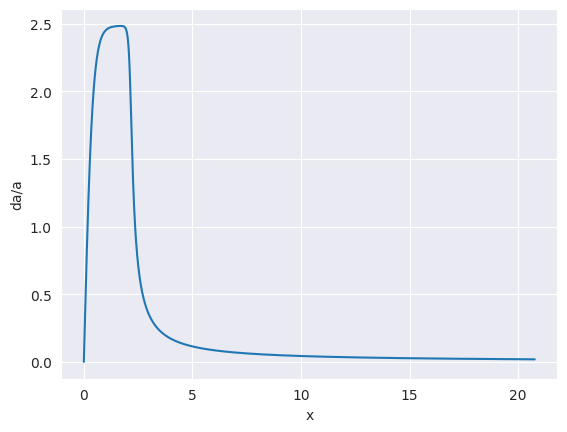

In [4]:
sns.lineplot(df_bIX_upside, x='x', y='da/a')

In [5]:
df_bIX_downside = pd.read_csv('bianchiIX_isotropic_eta_0.018000_omega_2_0.001000_1000p_downside.txt', sep=" ", header=None)
df_bIX_downside.columns = ['x', 'a', 'da', 'phi']
df_bIX_downside['da/a'] = df_bIX_downside['da'] / df_bIX_downside['a']
df_bIX_downside['x'] = df_bIX_downside['x'] - 2.36229

<Axes: xlabel='x', ylabel='da/a'>

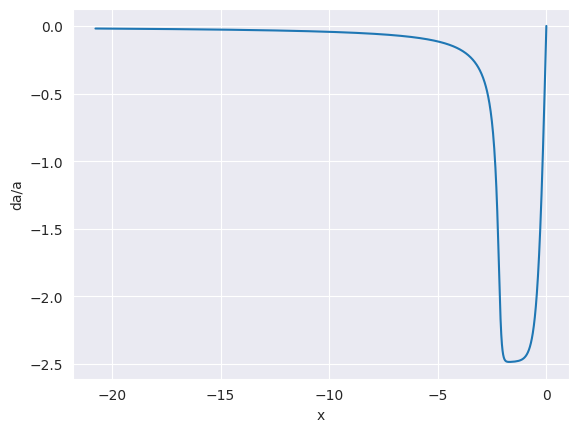

In [6]:
sns.lineplot(df_bIX_downside, x='x', y='da/a')

In [7]:
df_bIX_merged = pd.concat([df_bIX_downside, df_bIX_upside], axis=0)
df_bIX_merged

,x,a,da,phi,da/a
0,-20.76229,-3.98269,0.076478,-4.84240,-0.019203
1,-20.74389,-3.98128,0.076523,-4.84134,-0.019221
2,-20.72549,-3.97987,0.076567,-4.84028,-0.019239
3,-20.70709,-3.97846,0.076612,-4.83921,-0.019257
4,-20.68869,-3.97705,0.076657,-4.83815,-0.019275
...,...,...,...,...,...
1996,20.68869,3.97705,0.076657,-4.83815,0.019275
1997,20.70709,3.97846,0.076612,-4.83921,0.019257
1998,20.72549,3.97987,0.076567,-4.84028,0.019239
1999,20.74389,3.98128,0.076523,-4.84134,0.019221


<Axes: xlabel='$(t-t_0)H_0$', ylabel='$\\frac{H}{H_0}$'>

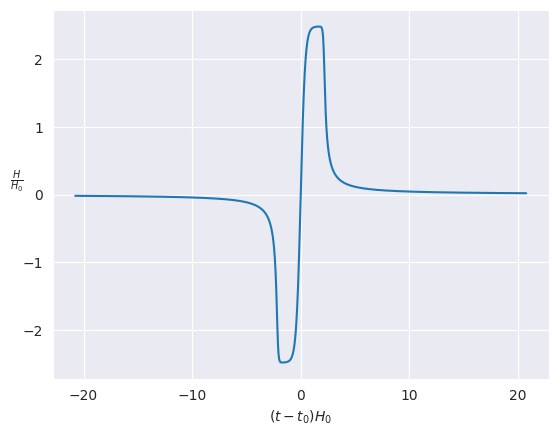

In [8]:
_, ax = plt.subplots()
ax.set_ylabel(r"$\frac{H}{H_0}$", rotation=0)
ax.set_xlabel(r"$(t-t_0)H_0$")
sns.lineplot(df_bIX_merged, x='x', y='da/a', ax=ax)


[(0.0, 4.6), (0.8, 1.05)]

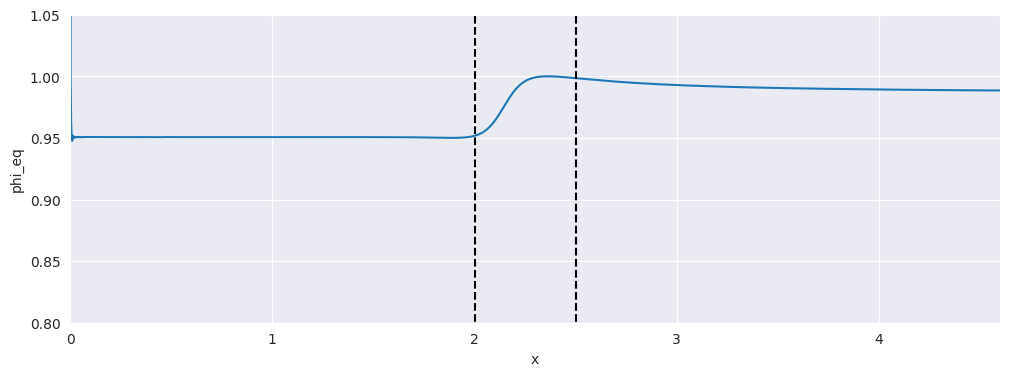

In [9]:
omega_2 = 1e-3
eta = 18*1e-3
a_iv = 1.0
da_iv = 1.0
dphi0 = 0.5 * math.log(3/4/math.pi * (da_iv**2/a_iv**2+omega_2/a_iv**2)/(1-3*eta*(3*da_iv**2/a_iv**2+omega_2/a_iv**2)))
const = math.exp(dphi0) * (3 * eta * (1 + omega_2) - 1)
# df['phi_eq'] = (df['a']**3 * math.exp(df['phi'])*(3*eta*((df['da']/df['a'])**2 + omega_2/df['a']**2)-1))/const
df_bIX_upside['phi_eq'] = (df_bIX_upside['a']**3 * df_bIX_upside['phi'].apply(lambda x: math.exp(x)) * (3 * eta * ((df_bIX_upside['da'] / df_bIX_upside['a'])**2 + omega_2/df_bIX_upside['a']**2) - 1))/const
fig, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(df_bIX_upside, x='x', y='phi_eq', ax=ax) 
ax.plot([2, 2], [0, 1.05], color='k', linestyle='--')
ax.plot([2.5, 2.5], [0, 1.05], color='k', linestyle='--')
ax.set(xlim=(0, 4.6), ylim=(0.8, 1.05))
# dphi0, const

[(0.0, 0.05), (0.8, 1.05)]

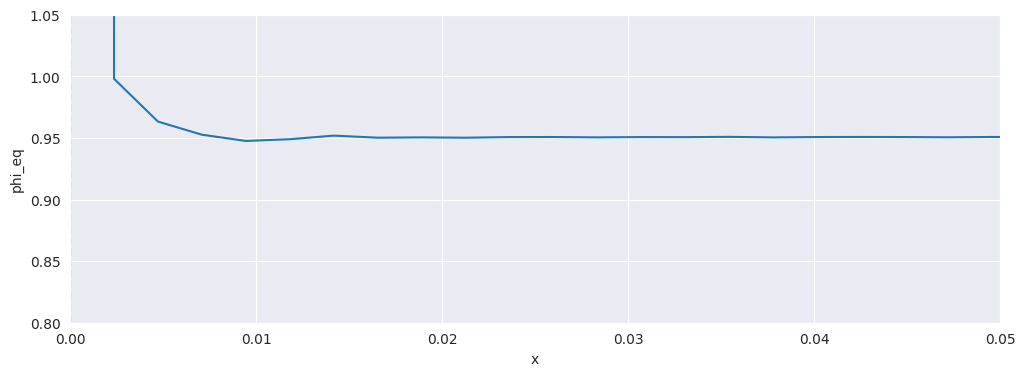

In [10]:
omega_2 = 1e-3
eta = 18*1e-3
a_iv = 1.0
da_iv = 1.0
dphi0 = 0.5 * math.log(3/4/math.pi * (da_iv**2/a_iv**2+omega_2/a_iv**2)/(1-3*eta*(3*da_iv**2/a_iv**2+omega_2/a_iv**2)))
const = math.exp(dphi0) * (3 * eta * (1 + omega_2) - 1)
# df['phi_eq'] = (df['a']**3 * math.exp(df['phi'])*(3*eta*((df['da']/df['a'])**2 + omega_2/df['a']**2)-1))/const
df_bIX_upside['phi_eq'] = (df_bIX_upside['a']**3 * df_bIX_upside['phi'].apply(lambda x: math.exp(x)) * (3 * eta * ((df_bIX_upside['da'] / df_bIX_upside['a'])**2 + omega_2/df_bIX_upside['a']**2) - 1))/const
_, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(df_bIX_upside, x='x', y='phi_eq', ax=ax) 
ax.plot([-0.5, -0.5], [0, 1.05], color='k', linestyle='--')
ax.plot([0.0, 0.0], [0, 1.05], color='k', linestyle='--')
ax.set(xlim=(0, 0.05), ylim=(0.8, 1.05))
# dphi0, const

In [11]:
df_bIX_upside_a = pd.read_csv('bianchiIX_anisotropic_eta_0.018000_omega_2_0.001000_1000p_upside.txt', sep=" ", header=None)
df_bIX_upside_a.columns = ['x', 'a', 'da', 'phi', 's']
df_bIX_upside_a['da/a'] = df_bIX_upside_a['da'] / df_bIX_upside_a['a']
df_bIX_upside_a['x'] = df_bIX_upside_a['x'] + 2.44

<Axes: xlabel='x', ylabel='da/a'>

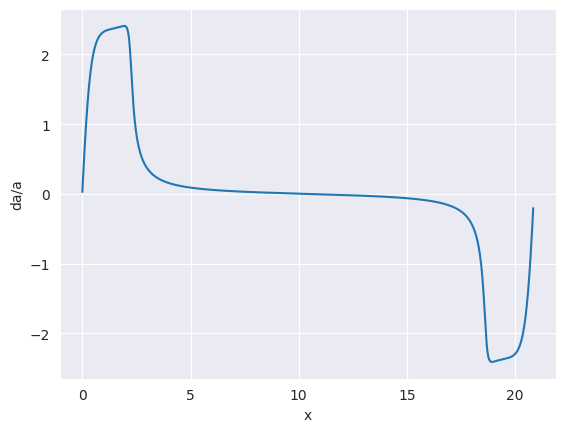

In [12]:
sns.lineplot(df_bIX_upside_a, x='x', y='da/a')

In [13]:
df_bIX_downside_a = pd.read_csv('bianchiIX_anisotropic_eta0.018000_omega_2_0.001000_1000p_downside.txt', sep=" ", header=None)
df_bIX_downside_a.columns = ['x', 'a', 'da', 'phi', 's']
df_bIX_downside_a['da/a'] = df_bIX_downside_a['da'] / df_bIX_downside_a['a']
df_bIX_downside_a['x'] = df_bIX_downside_a['x'] - 2.44

<Axes: xlabel='x', ylabel='da/a'>

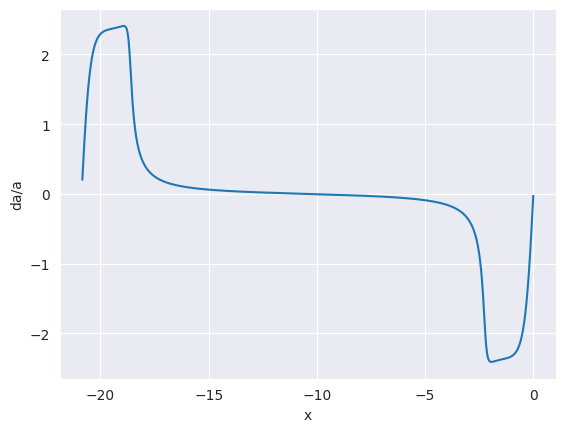

In [14]:
sns.lineplot(df_bIX_downside_a, x='x', y='da/a')

In [15]:
df_bIX_merged_a = pd.concat([df_bIX_downside_a, df_bIX_upside_a], axis=0)
df_bIX_merged_a

,x,a,da,phi,s,da/a
0,-20.8400,0.007373,0.001501,19.4490,-1.501230e-13,0.203553
1,-20.8216,0.007409,0.002330,18.5578,-8.796850e-13,0.314532
2,-20.8032,0.007459,0.003158,17.9358,-2.990850e-12,0.423381
3,-20.7848,0.007525,0.003986,17.4538,-7.637790e-12,0.529676
4,-20.7664,0.007606,0.004815,17.0574,-1.634390e-11,0.633071
...,...,...,...,...,...,...
1996,20.7664,0.007606,-0.004815,17.0574,1.634390e-11,-0.633071
1997,20.7848,0.007525,-0.003986,17.4538,7.637790e-12,-0.529676
1998,20.8032,0.007459,-0.003158,17.9358,2.990850e-12,-0.423381
1999,20.8216,0.007409,-0.002330,18.5578,8.796850e-13,-0.314532


In [21]:
df_bIX_merged_a['s*1000'] = df_bIX_merged_a['s'] * 1000

<Axes: xlabel='$(t-t_0)H_0$', ylabel='$\\frac{H}{H_0}$'>

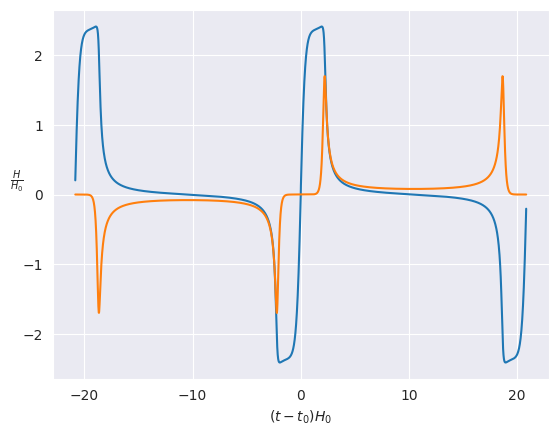

In [23]:
_, ax = plt.subplots()
ax.set_ylabel(r"$\frac{H}{H_0}$", rotation=0)
ax.set_xlabel(r"$(t-t_0)H_0$")
sns.lineplot(df_bIX_merged_a, x='x', y='da/a', ax=ax)
sns.lineplot(df_bIX_merged_a, x='x', y='s*1000', ax=ax)

<Axes: xlabel='$(t-t_0)H_0$', ylabel='$\\frac{H}{H_0}$'>

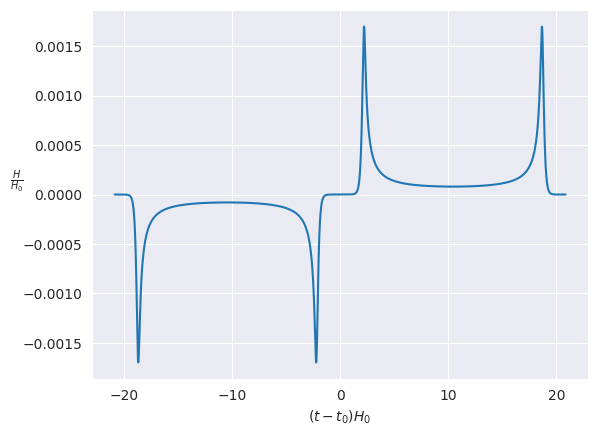

In [17]:
_, ax = plt.subplots()
ax.set_ylabel(r"$\frac{H}{H_0}$", rotation=0)
ax.set_xlabel(r"$(t-t_0)H_0$")
sns.lineplot(df_bIX_merged_a, x='x', y='s', ax=ax)

## Omega2 = 1e-5, eta=18*1e-3, s=1e-3

In [127]:
df_bIX_upside = pd.read_csv('bianchiIX_isotropic_eta_0.018000_omega_2_0.000010_1000p_upside.txt', sep=" ", header=None)
df_bIX_upside.columns = ['x', 'a', 'da', 'phi']
df_bIX_upside['da/a'] = df_bIX_upside['da'] / df_bIX_upside['a']
df_bIX_upside['x'] = df_bIX_upside['x'] + 3.2878

In [128]:
df_bIX_upside

,x,a,da,phi,da/a
0,-0.1122,NaN,NaN,NaN,NaN
1,-0.1088,NaN,NaN,NaN,NaN
2,-0.1054,NaN,NaN,NaN,NaN
3,-0.1020,NaN,NaN,NaN,NaN
4,-0.0986,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1996,25.5982,4.33788,0.073583,-5.09925,0.016963
1997,25.6206,4.33953,0.073546,-5.10039,0.016948
1998,25.6430,4.34118,0.073510,-5.10153,0.016933
1999,25.6654,4.34282,0.073473,-5.10267,0.016918


<Axes: xlabel='x', ylabel='da/a'>

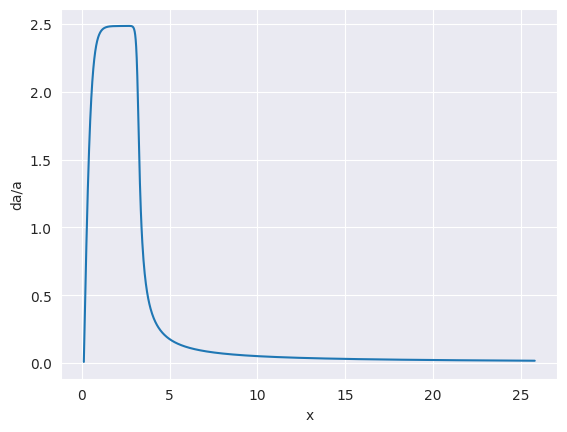

In [120]:
sns.lineplot(df_bIX_upside, x='x', y='da/a')

In [129]:
df_bIX_downside = pd.read_csv('bianchiIX_isotropic_eta_0.018000_omega_2_0.000010_1000p_downside.txt', sep=" ", header=None)
df_bIX_downside.columns = ['x', 'a', 'da', 'phi']
df_bIX_downside['da/a'] = df_bIX_downside['da'] / df_bIX_downside['a']
df_bIX_downside['x'] = df_bIX_downside['x'] - 3.2878

<Axes: xlabel='x', ylabel='da/a'>

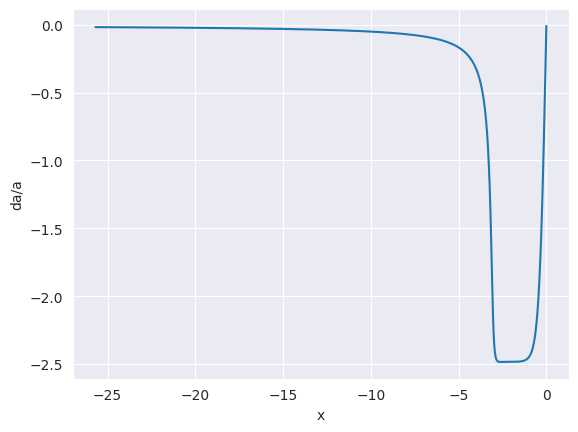

In [130]:
sns.lineplot(df_bIX_downside, x='x', y='da/a')

In [131]:
df_bIX_merged = pd.concat([df_bIX_downside, df_bIX_upside], axis=0)
df_bIX_merged

,x,a,da,phi,da/a
0,-25.6878,-4.34447,0.073437,-5.10381,-0.016903
1,-25.6654,-4.34282,0.073473,-5.10267,-0.016918
2,-25.6430,-4.34118,0.073510,-5.10153,-0.016933
3,-25.6206,-4.33953,0.073546,-5.10039,-0.016948
4,-25.5982,-4.33788,0.073583,-5.09925,-0.016963
...,...,...,...,...,...
1996,25.5982,4.33788,0.073583,-5.09925,0.016963
1997,25.6206,4.33953,0.073546,-5.10039,0.016948
1998,25.6430,4.34118,0.073510,-5.10153,0.016933
1999,25.6654,4.34282,0.073473,-5.10267,0.016918


In [132]:
df_bIX_merged = df_bIX_merged.dropna()

<Axes: xlabel='$(t-t_0)H_0$', ylabel='$\\frac{H}{H_0}$'>

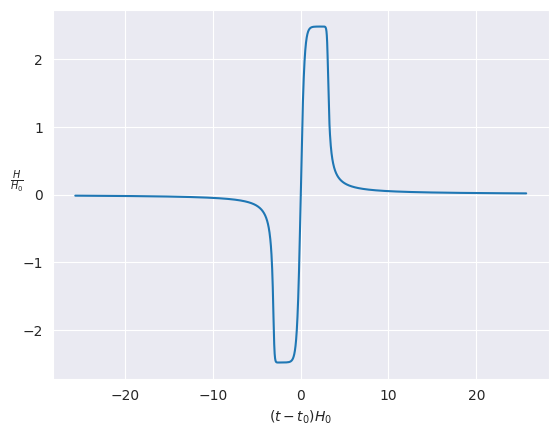

In [133]:
_, ax = plt.subplots()
ax.set_ylabel(r"$\frac{H}{H_0}$", rotation=0)
ax.set_xlabel(r"$(t-t_0)H_0$")
sns.lineplot(df_bIX_merged, x='x', y='da/a', ax=ax)


[(0.0, 4.6), (0.8, 1.05)]

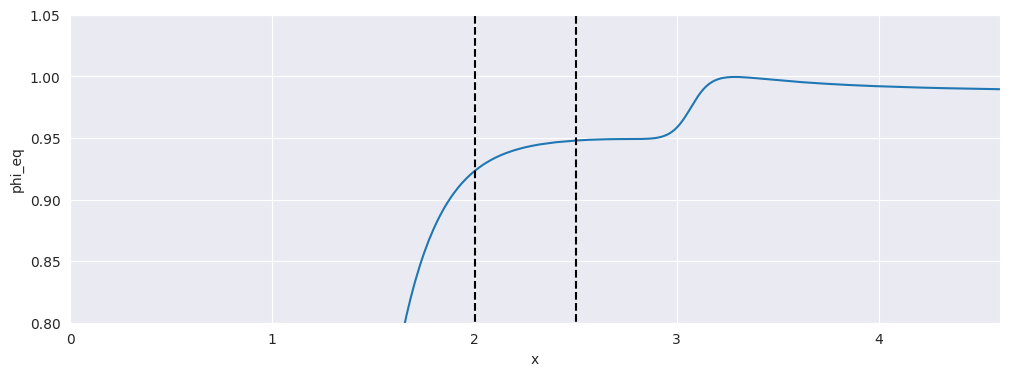

In [134]:
omega_2 = 1e-3
eta = 18*1e-3
a_iv = 1.0
da_iv = 1.0
dphi0 = 0.5 * math.log(3/4/math.pi * (da_iv**2/a_iv**2+omega_2/a_iv**2)/(1-3*eta*(3*da_iv**2/a_iv**2+omega_2/a_iv**2)))
const = math.exp(dphi0) * (3 * eta * (1 + omega_2) - 1)
# df['phi_eq'] = (df['a']**3 * math.exp(df['phi'])*(3*eta*((df['da']/df['a'])**2 + omega_2/df['a']**2)-1))/const
df_bIX_upside['phi_eq'] = (df_bIX_upside['a']**3 * df_bIX_upside['phi'].apply(lambda x: math.exp(x)) * (3 * eta * ((df_bIX_upside['da'] / df_bIX_upside['a'])**2 + omega_2/df_bIX_upside['a']**2) - 1))/const
fig, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(df_bIX_upside, x='x', y='phi_eq', ax=ax) 
ax.plot([2, 2], [0, 1.05], color='k', linestyle='--')
ax.plot([2.5, 2.5], [0, 1.05], color='k', linestyle='--')
ax.set(xlim=(0, 4.6), ylim=(0.8, 1.05))
# dphi0, const

[(0.0, 0.05), (0.8, 1.05)]

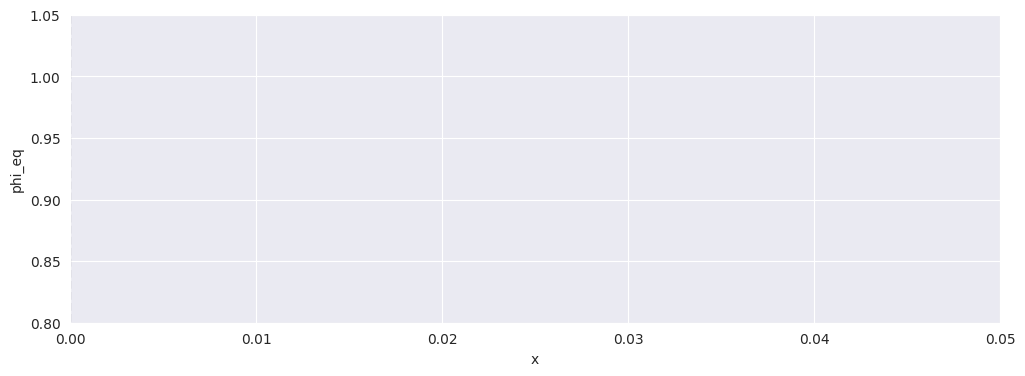

In [135]:
omega_2 = 1e-3
eta = 18*1e-3
a_iv = 1.0
da_iv = 1.0
dphi0 = 0.5 * math.log(3/4/math.pi * (da_iv**2/a_iv**2+omega_2/a_iv**2)/(1-3*eta*(3*da_iv**2/a_iv**2+omega_2/a_iv**2)))
const = math.exp(dphi0) * (3 * eta * (1 + omega_2) - 1)
# df['phi_eq'] = (df['a']**3 * math.exp(df['phi'])*(3*eta*((df['da']/df['a'])**2 + omega_2/df['a']**2)-1))/const
df_bIX_upside['phi_eq'] = (df_bIX_upside['a']**3 * df_bIX_upside['phi'].apply(lambda x: math.exp(x)) * (3 * eta * ((df_bIX_upside['da'] / df_bIX_upside['a'])**2 + omega_2/df_bIX_upside['a']**2) - 1))/const
_, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(df_bIX_upside, x='x', y='phi_eq', ax=ax) 
ax.plot([-0.5, -0.5], [0, 1.05], color='k', linestyle='--')
ax.plot([0.0, 0.0], [0, 1.05], color='k', linestyle='--')
ax.set(xlim=(0, 0.05), ylim=(0.8, 1.05))
# dphi0, const

In [138]:
df_bIX_upside_a = pd.read_csv('bianchiIX_anisotropic_eta_0.018000_omega_2_0.000010_1000p_upside.txt', sep=" ", header=None)
df_bIX_upside_a.columns = ['x', 'a', 'da', 'phi', 's']
df_bIX_upside_a['da/a'] = df_bIX_upside_a['da'] / df_bIX_upside_a['a']
df_bIX_upside_a['x'] = df_bIX_upside_a['x'] + 3.4195

In [139]:
df_bIX_upside_a

,x,a,da,phi,s,da/a
0,-0.0805,NaN,NaN,NaN,NaN,NaN
1,-0.0770,NaN,NaN,NaN,NaN,NaN
2,-0.0735,NaN,NaN,NaN,NaN,NaN
3,-0.0700,NaN,NaN,NaN,NaN,NaN
4,-0.0665,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1996,25.7299,NaN,NaN,NaN,NaN,NaN
1997,25.7523,NaN,NaN,NaN,NaN,NaN
1998,25.7747,NaN,NaN,NaN,NaN,NaN
1999,25.7971,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='x', ylabel='da/a'>

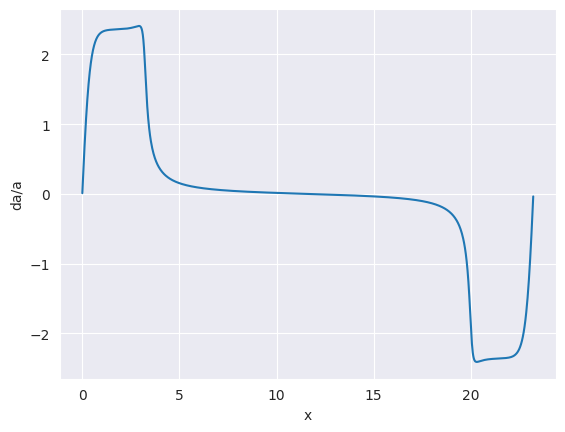

In [140]:
sns.lineplot(df_bIX_upside_a, x='x', y='da/a')

In [141]:
df_bIX_downside_a = pd.read_csv('bianchiIX_anisotropic_eta_0.018000_omega_2_0.000010_1000p_downside.txt', sep=" ", header=None)
df_bIX_downside_a.columns = ['x', 'a', 'da', 'phi', 's']
df_bIX_downside_a['da/a'] = df_bIX_downside_a['da'] / df_bIX_downside_a['a']
df_bIX_downside_a['x'] = df_bIX_downside_a['x'] - 3.4195

<Axes: xlabel='x', ylabel='da/a'>

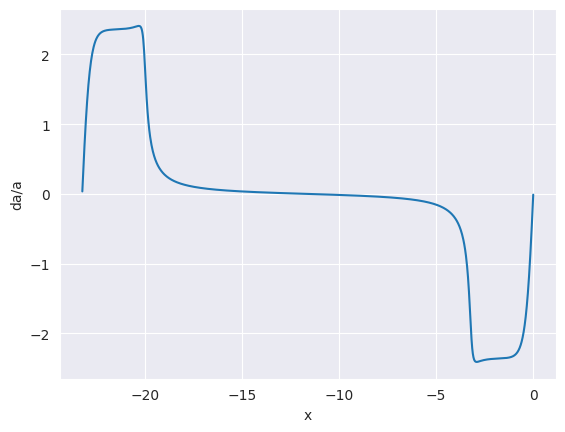

In [142]:
sns.lineplot(df_bIX_downside_a, x='x', y='da/a')

In [143]:
df_bIX_merged_a = pd.concat([df_bIX_downside_a, df_bIX_upside_a], axis=0)
df_bIX_merged_a

,x,a,da,phi,s,da/a
0,-25.8195,NaN,NaN,NaN,NaN,NaN
1,-25.7971,NaN,NaN,NaN,NaN,NaN
2,-25.7747,NaN,NaN,NaN,NaN,NaN
3,-25.7523,NaN,NaN,NaN,NaN,NaN
4,-25.7299,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1996,25.7299,NaN,NaN,NaN,NaN,NaN
1997,25.7523,NaN,NaN,NaN,NaN,NaN
1998,25.7747,NaN,NaN,NaN,NaN,NaN
1999,25.7971,NaN,NaN,NaN,NaN,NaN


In [144]:
df_bIX_merged_a = df_bIX_merged_a.dropna()

In [145]:
df_bIX_merged_a['s*1000'] = df_bIX_merged_a['s'].apply(lambda x: x * 1000)

/tmp/ipykernel_11760/2339086393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bIX_merged_a['s*1000'] = df_bIX_merged_a['s'].apply(lambda x: x * 1000)


<Axes: xlabel='$(t-t_0)H_0$', ylabel='$\\frac{H}{H_0}$'>

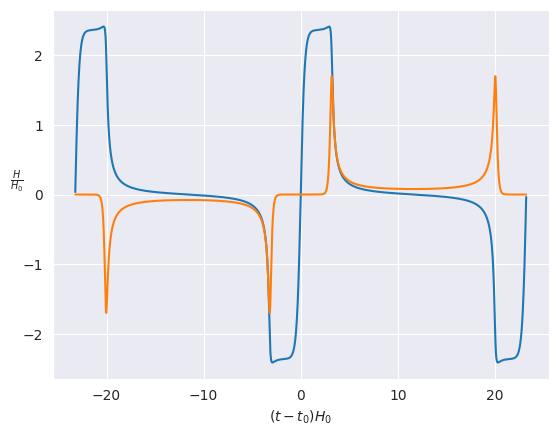

In [146]:
_, ax = plt.subplots()
ax.set_ylabel(r"$\frac{H}{H_0}$", rotation=0)
ax.set_xlabel(r"$(t-t_0)H_0$")
sns.lineplot(df_bIX_merged_a, x='x', y='da/a', ax=ax)
sns.lineplot(df_bIX_merged_a, x='x', y='s*1000', ax=ax)

<Axes: xlabel='$(t-t_0)H_0$', ylabel='$\\frac{H}{H_0}$'>

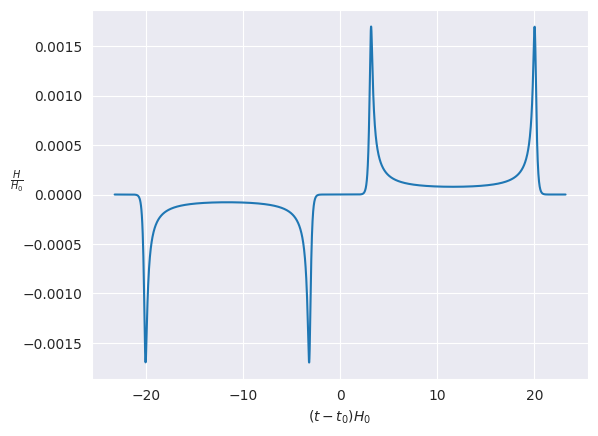

In [147]:
_, ax = plt.subplots()
ax.set_ylabel(r"$\frac{H}{H_0}$", rotation=0)
ax.set_xlabel(r"$(t-t_0)H_0$")
sns.lineplot(df_bIX_merged_a, x='x', y='s', ax=ax)

## Omega_2=1e-5, eta=18*1e-3, s=0.9

In [156]:
df_bIX_upside_a = pd.read_csv('bianchiIX_anisotropic_eta_0.018000_omega_2_0.000010_s_0.900000_1000p_upside.txt', sep=" ", header=None)
df_bIX_upside_a.columns = ['x', 'a', 'da', 'phi', 's']
df_bIX_upside_a['da/a'] = df_bIX_upside_a['da'] / df_bIX_upside_a['a']
df_bIX_upside_a['x'] = df_bIX_upside_a['x'] + 3.4195

In [157]:
df_bIX_upside_a

,x,a,da,phi,s,da/a
0,-0.0805,NaN,NaN,NaN,NaN,NaN
1,-0.0770,NaN,NaN,NaN,NaN,NaN
2,-0.0735,NaN,NaN,NaN,NaN,NaN
3,-0.0700,NaN,NaN,NaN,NaN,NaN
4,-0.0665,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1996,25.7299,NaN,NaN,NaN,NaN,NaN
1997,25.7523,NaN,NaN,NaN,NaN,NaN
1998,25.7747,NaN,NaN,NaN,NaN,NaN
1999,25.7971,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='x', ylabel='da/a'>

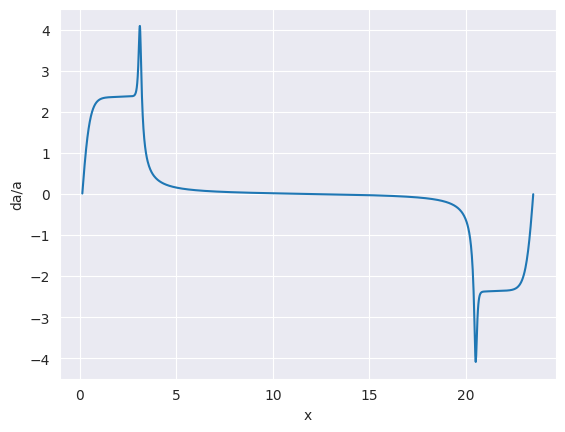

In [158]:
sns.lineplot(df_bIX_upside_a, x='x', y='da/a')

In [159]:
df_bIX_downside_a = pd.read_csv('bianchiIX_anisotropic_eta_0.018000_omega_2_0.000010_s_0.900000_1000p_downside.txt', sep=" ", header=None)
df_bIX_downside_a.columns = ['x', 'a', 'da', 'phi', 's']
df_bIX_downside_a['da/a'] = df_bIX_downside_a['da'] / df_bIX_downside_a['a']
df_bIX_downside_a['x'] = df_bIX_downside_a['x'] - 3.4195

<Axes: xlabel='x', ylabel='da/a'>

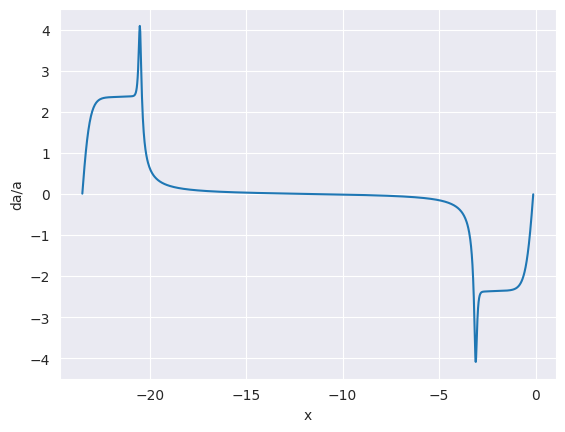

In [160]:
sns.lineplot(df_bIX_downside_a, x='x', y='da/a')

In [161]:
df_bIX_merged_a = pd.concat([df_bIX_downside_a, df_bIX_upside_a], axis=0)
df_bIX_merged_a

,x,a,da,phi,s,da/a
0,-25.8195,NaN,NaN,NaN,NaN,NaN
1,-25.7971,NaN,NaN,NaN,NaN,NaN
2,-25.7747,NaN,NaN,NaN,NaN,NaN
3,-25.7523,NaN,NaN,NaN,NaN,NaN
4,-25.7299,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1996,25.7299,NaN,NaN,NaN,NaN,NaN
1997,25.7523,NaN,NaN,NaN,NaN,NaN
1998,25.7747,NaN,NaN,NaN,NaN,NaN
1999,25.7971,NaN,NaN,NaN,NaN,NaN


In [162]:
df_bIX_merged_a = df_bIX_merged_a.dropna()

In [163]:
df_bIX_merged_a['s*1000'] = df_bIX_merged_a['s'].apply(lambda x: x * 1000)

/tmp/ipykernel_11760/2339086393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bIX_merged_a['s*1000'] = df_bIX_merged_a['s'].apply(lambda x: x * 1000)


<Axes: xlabel='$(t-t_0)H_0$', ylabel='$\\frac{H}{H_0}$'>

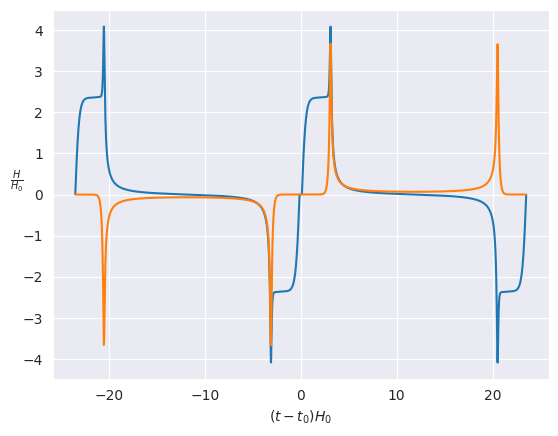

In [166]:
_, ax = plt.subplots()
ax.set_ylabel(r"$\frac{H}{H_0}$", rotation=0)
ax.set_xlabel(r"$(t-t_0)H_0$")
sns.lineplot(df_bIX_merged_a, x='x', y='da/a', ax=ax)
sns.lineplot(df_bIX_merged_a, x='x', y='s', ax=ax)

<Axes: xlabel='$(t-t_0)H_0$', ylabel='$\\frac{H}{H_0}$'>

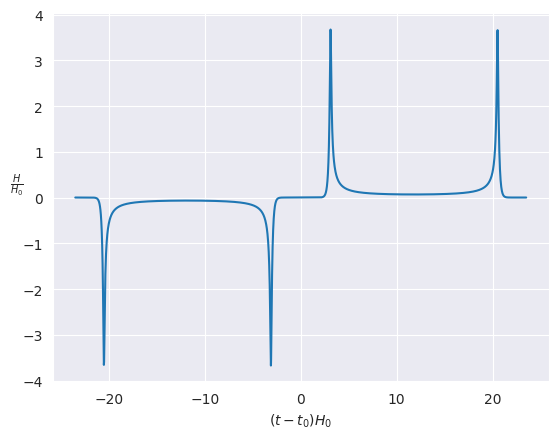

In [165]:
_, ax = plt.subplots()
ax.set_ylabel(r"$\frac{H}{H_0}$", rotation=0)
ax.set_xlabel(r"$(t-t_0)H_0$")
sns.lineplot(df_bIX_merged_a, x='x', y='s', ax=ax)

## Omega_2=1e-5, eta=18*1e-3, s=0.78

In [173]:
df_bIX_upside_a = pd.read_csv('bianchiIX_anisotropic_eta_0.018000_omega_2_0.000010_s_0.780000_1000p_upside.txt', sep=" ", header=None)
df_bIX_upside_a.columns = ['x', 'a', 'da', 'phi', 's']
df_bIX_upside_a['da/a'] = df_bIX_upside_a['da'] / df_bIX_upside_a['a']
df_bIX_upside_a['x'] = df_bIX_upside_a['x'] + 3.4195

In [174]:
df_bIX_upside_a

,x,a,da,phi,s,da/a
0,-0.0805,NaN,NaN,NaN,NaN,NaN
1,-0.0770,NaN,NaN,NaN,NaN,NaN
2,-0.0735,NaN,NaN,NaN,NaN,NaN
3,-0.0700,NaN,NaN,NaN,NaN,NaN
4,-0.0665,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1996,25.7299,NaN,NaN,NaN,NaN,NaN
1997,25.7523,NaN,NaN,NaN,NaN,NaN
1998,25.7747,NaN,NaN,NaN,NaN,NaN
1999,25.7971,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='x', ylabel='da/a'>

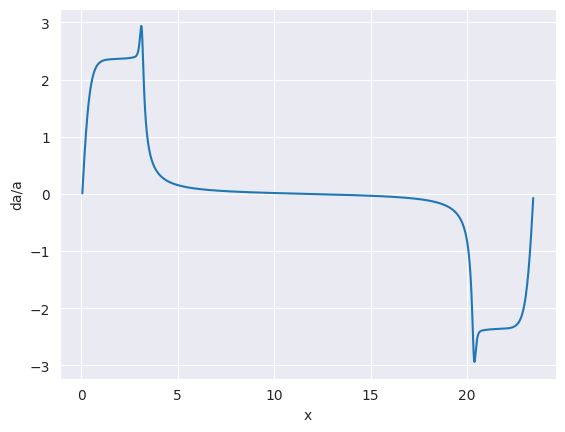

In [175]:
sns.lineplot(df_bIX_upside_a, x='x', y='da/a')

In [178]:
df_bIX_downside_a = pd.read_csv('bianchiIX_anisotropic_eta_0.018000_omega_2_0.000010_s_0.780000_1000p_downside.txt', sep=" ", header=None)
df_bIX_downside_a.columns = ['x', 'a', 'da', 'phi', 's']
df_bIX_downside_a['da/a'] = df_bIX_downside_a['da'] / df_bIX_downside_a['a']
df_bIX_downside_a['x'] = df_bIX_downside_a['x'] - 3.4195

<Axes: xlabel='x', ylabel='da/a'>

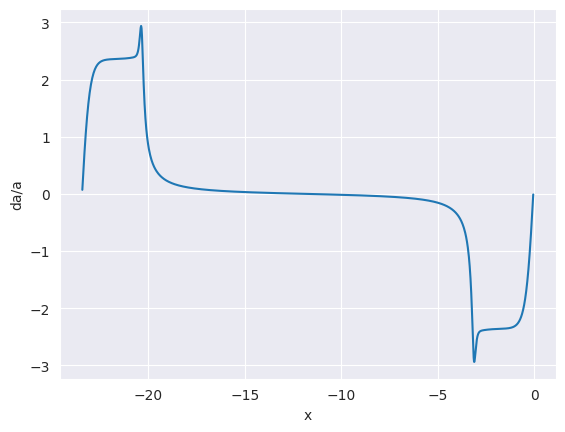

In [179]:
sns.lineplot(df_bIX_downside_a, x='x', y='da/a')

In [180]:
df_bIX_merged_a = pd.concat([df_bIX_downside_a, df_bIX_upside_a], axis=0)
df_bIX_merged_a

,x,a,da,phi,s,da/a
0,-25.8195,NaN,NaN,NaN,NaN,NaN
1,-25.7971,NaN,NaN,NaN,NaN,NaN
2,-25.7747,NaN,NaN,NaN,NaN,NaN
3,-25.7523,NaN,NaN,NaN,NaN,NaN
4,-25.7299,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1996,25.7299,NaN,NaN,NaN,NaN,NaN
1997,25.7523,NaN,NaN,NaN,NaN,NaN
1998,25.7747,NaN,NaN,NaN,NaN,NaN
1999,25.7971,NaN,NaN,NaN,NaN,NaN


In [181]:
df_bIX_merged_a = df_bIX_merged_a.dropna()

In [182]:
df_bIX_merged_a['s*1000'] = df_bIX_merged_a['s'].apply(lambda x: x * 1000)

/tmp/ipykernel_11760/2339086393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bIX_merged_a['s*1000'] = df_bIX_merged_a['s'].apply(lambda x: x * 1000)


<Axes: xlabel='$(t-t_0)H_0$', ylabel='$\\frac{H}{H_0}$'>

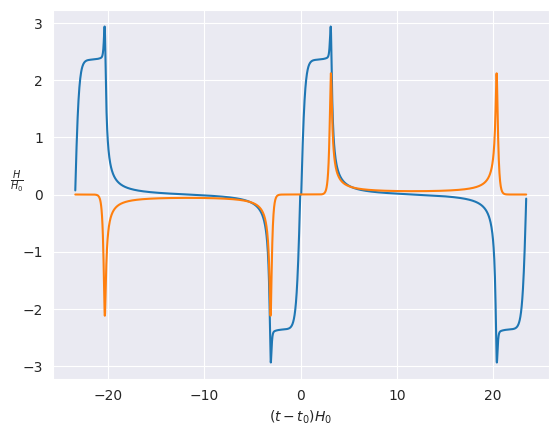

In [183]:
_, ax = plt.subplots()
ax.set_ylabel(r"$\frac{H}{H_0}$", rotation=0)
ax.set_xlabel(r"$(t-t_0)H_0$")
sns.lineplot(df_bIX_merged_a, x='x', y='da/a', ax=ax)
sns.lineplot(df_bIX_merged_a, x='x', y='s', ax=ax)

<Axes: xlabel='$(t-t_0)H_0$', ylabel='$\\frac{H}{H_0}$'>

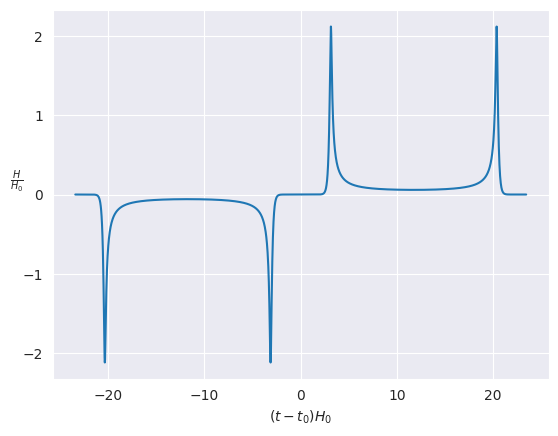

In [184]:
_, ax = plt.subplots()
ax.set_ylabel(r"$\frac{H}{H_0}$", rotation=0)
ax.set_xlabel(r"$(t-t_0)H_0$")
sns.lineplot(df_bIX_merged_a, x='x', y='s', ax=ax)